In [1]:
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

pd.options.mode.chained_assignment = None

## Functions

In [2]:
def sum_dict(results:dict)->list:
    return list(map(sum, zip(*results.values())))

In [3]:
def normalize_col(column):
    return (column - column.min()) / (column.max()-column.min())

In [4]:
def df_basing(df:pd.DataFrame)->(pd.DataFrame,pd.DataFrame):
    base_df = df.iloc[:,0].fillna(method='ffill')
    diff_df = df.iloc[:,1:]
    for col in diff_df.columns:
        diff_df.loc[:,col] = diff_df.loc[:,col].div(base_df, axis=0)
    diff_df=diff_df.apply(lambda x: x-1)
    return base_df, diff_df

In [5]:
def base_plot(tickers:list, diff_df):
    fig, ax = plt.subplots(1,1,figsize = (20,10))
    ax.axhline(0 ,color="r", label = tickers[0])
    ax.plot(diff_df,label=diff_df.columns)
    ax.set_title("Difference of European Traded Stocks Versus NYSE Traded Stock")
    ax.set_xlabel("Date")
    ax.set_ylabel(f"Percentage difference to {test_tickers[0]}")
    ax.legend()

In [6]:
def extract_trading_days(df):
    filled_df = df.fillna(method='ffill')
    return [group[1].between_time("14:30","16:30") for group in filled_df.groupby(filled_df.index.day)]

In [7]:
def get_price_data(dates, tickers:list):
    dates = dates.values.flatten().tolist()
    start, end = datetime.utcfromtimestamp(dates[0]/1e9),datetime.utcfromtimestamp(dates[1]/1e9)
    
    data = [yf.Ticker(ticker).history(interval='5m', start=start, end=end)["Close"] for ticker in tickers]
    eur_usd = yf.Ticker('EUR=X').history(interval='5m', start=start, end=end)["Close"]
    
    price_df = pd.concat(data, axis=1, ignore_index=False) #price data
    price_df.columns = tickers
    eur_usd=eur_usd.reindex(price_df.index).fillna(method='ffill')
    
    dfs_to_convert = [ticker for ticker in tickers if "." in ticker]
    price_df.loc[:,dfs_to_convert] = price_df.loc[:,dfs_to_convert].multiply(eur_usd.loc[price_df.index], axis=0)
    
    return_df = pd.concat(data, axis=1, ignore_index=False) #price data
    return_df.columns = tickers
    for col in return_df.columns:
        return_df[col] = normalize_col(return_df[col])
    return price_df, return_df

In [8]:
def trade(trader, time_blocks, tickers:list)->list:
    total_history = []
    for i in tqdm(range(len(time_blocks))): # time block: each week
        t1,t2 = get_price_data(time_blocks.loc[i], tickers) # price df, return df
        trading_days_returns = extract_trading_days(t2)
        trading_days_price = extract_trading_days(t1)
        
        bal_history = []
        for td_return, td_price in zip(trading_days_returns,trading_days_price): # trading day: each day
            base_df, diff_df = df_basing(td_return)
            for idx in diff_df.index: # time: each timeframe (5m)
                price_data = td_price.loc[idx].values.flatten().tolist()
                return_data = diff_df.loc[idx].values.flatten().tolist()
                
                trader.data_feed(idx.time(), return_data, price_data, tickers)
                bal_history.append([idx.to_pydatetime(),trader.balance])
        total_history.append(bal_history)
    return sum(total_history,[])

In [9]:
def download_data(time_blocks, tickers:list)
    for i in range(len(time_blocks)):

SyntaxError: expected ':' (2030268070.py, line 1)

## Get company tickers

In [10]:
companies = pd.read_excel("Stocks.xlsx")

In [11]:
company_names = companies.iloc[:,0]

In [12]:
us_tickers = companies.iloc[:,2:5]
non_us_tickers = companies.iloc[:,5:]
eu_tickers = non_us_tickers.drop(["NEO","BUE","SGO","LSE","IOB","SAO","STO","JPX","HKG","KSC","MEX"], axis = 1)

In [13]:
arb_df = us_tickers.join(eu_tickers).set_index(company_names.values).drop("Fujitsu")
display(arb_df)

,NMS,NMS2,NYQ,GER,FRA,BER,DUS,ISE,MIL,VIE,VIE2
Ryanair,RYAAY,NaN,NaN,RY4C.DE,RY4C.F,RY4D.BE,RY4D.DU,RYA.IR,NaN,NaN,NaN
Tesla,TSLA,NaN,NaN,TL0.DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Netflix,NFLX,NaN,NaN,NFC.DE,NaN,NaN,NaN,NaN,NFLX.MI,NaN,NaN
Google,GOOG,GOOGL,NaN,ABEA.DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Berkshire Hathaway,BRK-B,BRK-A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BRKB.VI,BRKA.VI
Amazon,AMZN,NaN,NaN,AMZ.DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Walmart,WMT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Apple,AAPL,NaN,NaN,APC.DE,APC.F,NaN,NaN,NaN,NaN,NaN,NaN
Microsoft,MSFT,NaN,NaN,MSF.DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
General Motors,NaN,NaN,GM,8GM.DE,8GM.F,NaN,NaN,NaN,NaN,GMOT.VI,NaN


## Get Price Data

In [14]:
starts = pd.bdate_range('2022-12-01', '2023-01-20', freq="7B").to_frame(index=False)
stops = pd.bdate_range('2022-12-08', '2023-01-27', freq="7B").to_frame(index=False)
time_blocks = pd.concat([starts,stops], axis = 1)

display(time_blocks)

,0,0
0,2022-12-01,2022-12-08
1,2022-12-12,2022-12-19
2,2022-12-21,2022-12-28
3,2022-12-30,2023-01-06
4,2023-01-10,2023-01-17
5,2023-01-19,2023-01-26


In [29]:
test_tickers = ["RYAAY","RYA.IR","RY4C.DE"]

In [30]:
t1,t2 = get_price_data(time_blocks.loc[0], test_tickers)

## Visual Analysis

<AxesSubplot:xlabel='Datetime'>

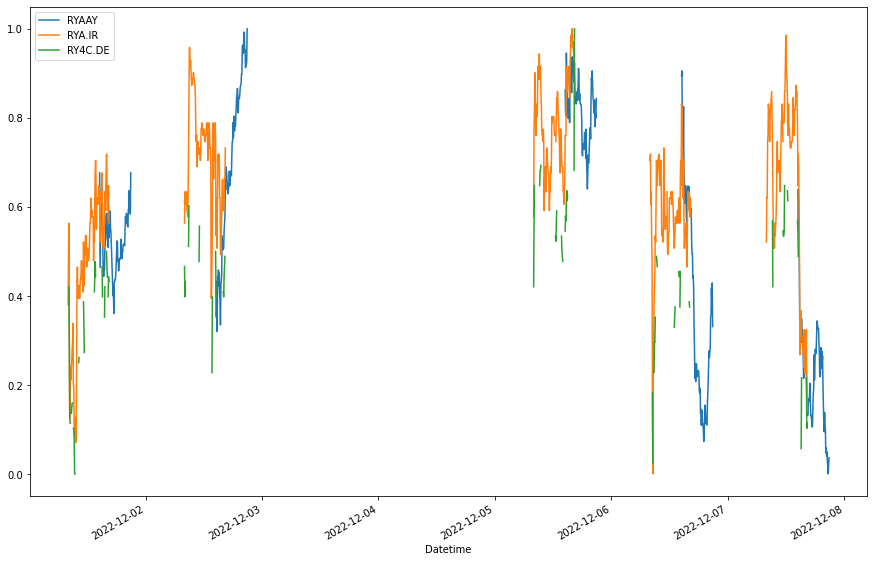

In [31]:
t2.plot(figsize=(15,10))

In [32]:
base_df, diff_df = df_basing(t2)

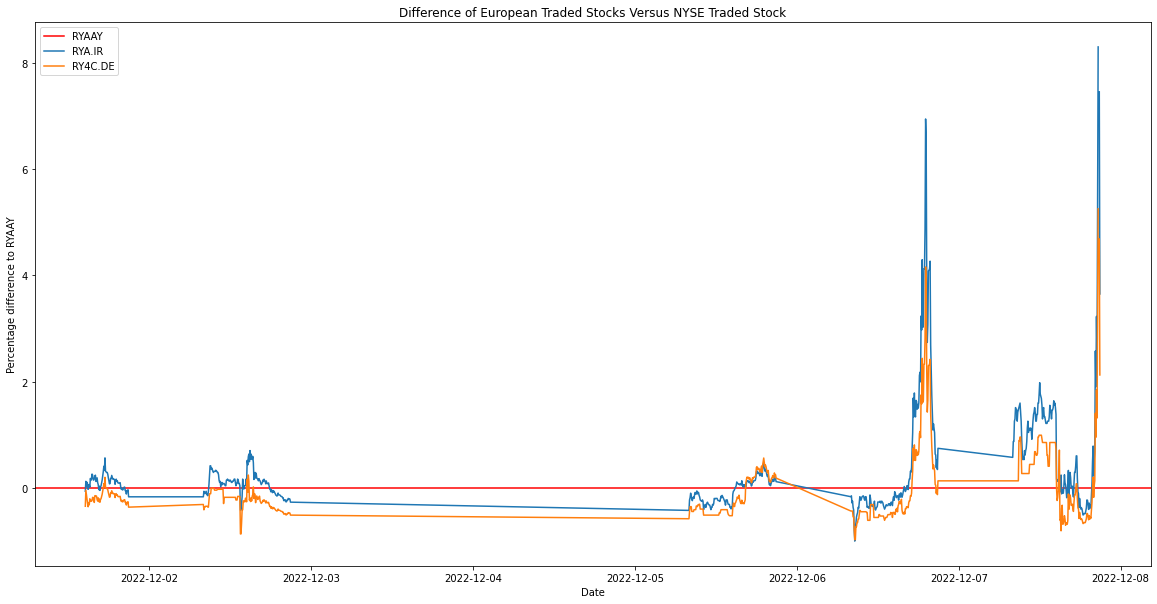

In [33]:
base_plot(test_tickers, diff_df)

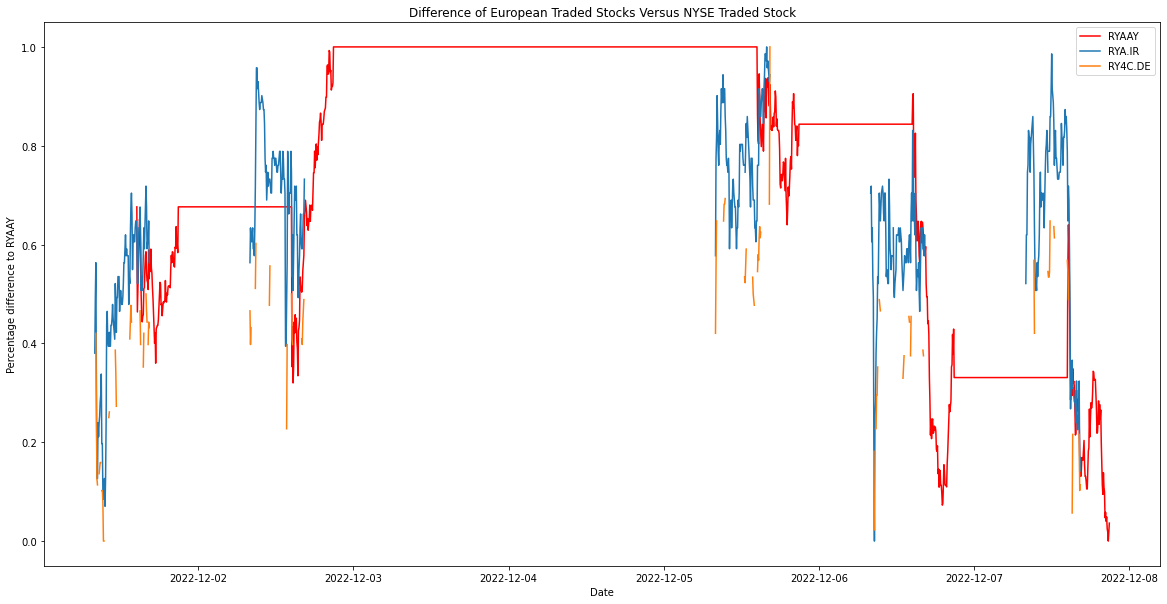

In [34]:
fig, ax = plt.subplots(1,1,figsize = (20,10))
ax.plot(base_df, label=base_df.name , color = "r")
ax.plot(t2[test_tickers[-2:]],label=t2[test_tickers[-2:]].columns)
ax.set_title("Difference of European Traded Stocks Versus NYSE Traded Stock")
ax.set_xlabel("Date")
ax.set_ylabel(f"Percentage difference to {test_tickers[0]}")
ax.legend()

## Trading Test

In [15]:
from IntradayRegionArbitrage import IntradayRegionArbitrage as IRA

In [16]:
histories = {}

In [17]:
for row in tqdm(arb_df.iterrows()):
    trader = IRA(1000, 0.8, 0.2, 0.1, 0.1, True)
    lst = list(row[1].dropna())
    if len(lst) > 1 and any("." in elem for elem in lst) and row[0] not in histories:
        histories[row[0]] = trade(trader, time_blocks, lst)

0it [00:00, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

	--Opening Trade
		BaseShare-> amt: -2.6427 @75.6800 --> total: -200.0000
		Ticker RY4C.F-> amt: 16.1141 @12.4115 --> total: 200.0000
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 2.6427 @75.4500 --> total: 199.3922
		Ticker RY4C.F-> amt: -16.1141 @12.4115 --> total: -200.0000
	 PNL: -0.0608%
########################################## Market-Closing ##########################################
	--Opening Trade
		BaseShare-> amt: -2.5685 @77.8200 --> total: -199.8784
		Ticker RY4D.DU-> amt: 2.8904 @69.1529 --> total: 199.8784
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 2.5685 @78.0250 --> total: 200.4050
		Ticker RY4D.DU-> amt: -2.8904 @69.1529 --> total: -199.8784
	 PNL: 0.0527%
########################################## Market-Closing ##########################################
	--Opening Trade
		BaseShare-> amt: -0.8537 @78.0850 --> total: -66.6612
		Ticker RY4C.F-> amt: 5.2888 @12.6042 --> total: 66.6612
		BaseShare-> amt: -0.8537 @78.085

  0%|          | 0/6 [00:00<?, ?it/s]

	--Opening Trade
		BaseShare-> amt: -1.1581 @172.6900 --> total: -200.0000
		Ticker TL0.DE-> amt: 1.2766 @156.6601 --> total: 200.0000
	take profit
	--Closing Trade
		BaseShare-> amt: 1.1581 @174.6300 --> total: 202.2468
		Ticker TL0.DE-> amt: -1.2766 @158.3224 --> total: -202.1222
	 PNL: 0.0125%
	--Opening Trade
		BaseShare-> amt: -1.7353 @115.2700 --> total: -200.0249
		Ticker TL0.DE-> amt: 1.9974 @100.1420 --> total: 200.0249
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 1.7353 @116.2900 --> total: 201.7949
		Ticker TL0.DE-> amt: -1.9974 @101.2323 --> total: -202.2028
	 PNL: -0.0408%
########################################## Market-Closing ##########################################


  0%|          | 0/6 [00:00<?, ?it/s]

	--Opening Trade
		BaseShare-> amt: -0.3273 @305.4950 --> total: -100.0000
		Ticker NFC.DE-> amt: 0.3587 @278.7784 --> total: 100.0000
		BaseShare-> amt: -0.3273 @305.4950 --> total: -100.0000
		Ticker NFLX.MI-> amt: 0.3595 @278.1884 --> total: 100.0000
	take profit
	--Closing Trade
		BaseShare-> amt: 0.3273 @306.4200 --> total: 100.3028
		Ticker NFLX.MI-> amt: -0.3595 @276.8601 --> total: -99.5225
	 PNL: 0.0780%
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 0.3273 @306.7400 --> total: 100.4075
		Ticker NFC.DE-> amt: -0.3587 @277.2317 --> total: -99.4452
	 PNL: 0.0962%
########################################## Market-Closing ##########################################
	--Opening Trade
		BaseShare-> amt: -0.6577 @304.6000 --> total: -200.3485
		Ticker NFC.DE-> amt: 0.7229 @277.1290 --> total: 200.3485
	take profit
	--Closing Trade
		BaseShare-> amt: 0.6577 @306.7000 --> total: 201.7298
		Ticker NFC.DE-> amt: -0.7229 @275.1408 --> total: -198.9111
	 PNL: 0.2814%
	-

  0%|          | 0/6 [00:00<?, ?it/s]

	--Opening Trade
		BaseShare-> amt: -2.2121 @90.4100 --> total: -200.0000
		Ticker ABEA.DE-> amt: 2.5026 @79.9173 --> total: 200.0000
	take profit
	--Closing Trade
		BaseShare-> amt: 2.2121 @90.8400 --> total: 200.9512
		Ticker ABEA.DE-> amt: -2.5026 @80.0785 --> total: -200.4034
	 PNL: 0.0548%
	--Opening Trade
		BaseShare-> amt: -2.2129 @90.4300 --> total: -200.1096
		Ticker ABEA.DE-> amt: 2.4988 @80.0814 --> total: 200.1096
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 2.2129 @90.4900 --> total: 200.2423
		Ticker ABEA.DE-> amt: -2.4988 @80.1626 --> total: -200.3123
	 PNL: -0.0070%
########################################## Market-Closing ##########################################
	--Opening Trade
		BaseShare-> amt: -2.2816 @87.7000 --> total: -200.0956
		Ticker ABEA.DE-> amt: 2.6622 @75.1626 --> total: 200.0956
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 2.2816 @88.6550 --> total: 202.2745
		Ticker ABEA.DE-> amt: -2.6622 @76.4039 --> to

  0%|          | 0/6 [00:00<?, ?it/s]

	--Opening Trade
		BaseShare-> amt: -0.6494 @308.0000 --> total: -200.0000
		Ticker BRKA.VI-> amt: 0.0005 @425454.5950 --> total: 200.0000
	stop loss
	--Closing Trade
		BaseShare-> amt: 0.6494 @307.7800 --> total: 199.8571
		Ticker BRKA.VI-> amt: -0.0005 @425454.5950 --> total: -200.0000
	 PNL: -0.0143%
	--Opening Trade
		BaseShare-> amt: -0.6491 @308.0600 --> total: -199.9714
		Ticker BRKA.VI-> amt: 0.0005 @425454.5950 --> total: 199.9714
	stop loss
	--Closing Trade
		BaseShare-> amt: 0.6491 @307.7350 --> total: 199.7605
		Ticker BRKA.VI-> amt: -0.0005 @425454.5950 --> total: -199.9714
	 PNL: -0.0211%
	--Opening Trade
		BaseShare-> amt: -0.6547 @305.3644 --> total: -199.9292
		Ticker BRKA.VI-> amt: 0.0005 @423532.4957 --> total: 199.9292
	stop loss
	--Closing Trade
		BaseShare-> amt: 0.6547 @305.4400 --> total: 199.9787
		Ticker BRKA.VI-> amt: -0.0005 @423532.4957 --> total: -199.9292
	 PNL: 0.0050%
	--Opening Trade
		BaseShare-> amt: -0.6556 @304.9600 --> total: -199.9391
		Ticker BR

	--Opening Trade
		BaseShare-> amt: -0.6450 @310.4550 --> total: -200.2347
		Ticker BRKB.VI-> amt: 0.7149 @280.0812 --> total: 200.2347
	stop loss
	--Closing Trade
		BaseShare-> amt: 0.6450 @311.4650 --> total: 200.8862
		Ticker BRKB.VI-> amt: -0.7149 @280.0812 --> total: -200.2347
	 PNL: 0.0651%
	--Opening Trade
		BaseShare-> amt: -0.6454 @310.4700 --> total: -200.3650
		Ticker BRKB.VI-> amt: 0.7154 @280.0812 --> total: 200.3650
	stop loss
	--Closing Trade
		BaseShare-> amt: 0.6454 @309.9500 --> total: 200.0294
		Ticker BRKB.VI-> amt: -0.7154 @280.0812 --> total: -200.3650
	 PNL: -0.0335%
	--Opening Trade
		BaseShare-> amt: -0.6447 @310.6800 --> total: -200.2979
		Ticker BRKB.VI-> amt: 0.7151 @280.0812 --> total: 200.2979
	stop loss
	--Closing Trade
		BaseShare-> amt: 0.6447 @310.1600 --> total: 199.9627
		Ticker BRKB.VI-> amt: -0.7151 @280.0812 --> total: -200.2979
	 PNL: -0.0335%
	--Opening Trade
		BaseShare-> amt: -0.3233 @309.7000 --> total: -100.1154
		Ticker BRKB.VI-> amt: 0.357

	--Opening Trade
		BaseShare-> amt: -0.3280 @305.6600 --> total: -100.2675
		Ticker BRKB.VI-> amt: 0.3803 @263.6497 --> total: 100.2675
		BaseShare-> amt: -0.3280 @305.6600 --> total: -100.2675
		Ticker BRKA.VI-> amt: 0.0003 @398502.6022 --> total: 100.2675
	stop loss
	--Closing Trade
		BaseShare-> amt: 0.3280 @305.9120 --> total: 100.3501
		Ticker BRKB.VI-> amt: -0.3803 @263.6497 --> total: -100.2675
	 PNL: 0.0082%
	stop loss
	--Closing Trade
		BaseShare-> amt: 0.3280 @305.4350 --> total: 100.1937
		Ticker BRKA.VI-> amt: -0.0003 @398502.6022 --> total: -100.2675
	 PNL: -0.0074%
	--Opening Trade
		BaseShare-> amt: -0.3290 @304.8100 --> total: -100.2684
		Ticker BRKB.VI-> amt: 0.3803 @263.6497 --> total: 100.2684
		BaseShare-> amt: -0.3290 @304.8100 --> total: -100.2684
		Ticker BRKA.VI-> amt: 0.0003 @398502.6022 --> total: 100.2684
	stop loss
	--Closing Trade
		BaseShare-> amt: 0.3290 @305.0000 --> total: 100.3309
		Ticker BRKB.VI-> amt: -0.3803 @263.6497 --> total: -100.2684
	 PNL: 0.

  0%|          | 0/6 [00:00<?, ?it/s]

	--Opening Trade
		BaseShare-> amt: -2.2771 @87.8300 --> total: -200.0000
		Ticker AMZ.DE-> amt: 2.5138 @79.5614 --> total: 200.0000
	take profit
	--Closing Trade
		BaseShare-> amt: 2.2771 @88.7750 --> total: 202.1519
		Ticker AMZ.DE-> amt: -2.5138 @80.4028 --> total: -202.1152
	 PNL: 0.0037%
	--Opening Trade
		BaseShare-> amt: -2.2736 @87.9705 --> total: -200.0073
		Ticker AMZ.DE-> amt: 2.5001 @79.9982 --> total: 200.0073
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 2.2736 @87.6699 --> total: 199.3239
		Ticker AMZ.DE-> amt: -2.5001 @79.6731 --> total: -199.1946
	 PNL: 0.0129%
########################################## Market-Closing ##########################################
	--Opening Trade
		BaseShare-> amt: -2.2526 @88.8000 --> total: -200.0332
		Ticker AMZ.DE-> amt: 2.6075 @76.7157 --> total: 200.0332
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 2.2526 @89.2200 --> total: 200.9793
		Ticker AMZ.DE-> amt: -2.6075 @77.4562 --> total: -2

  0%|          | 0/6 [00:00<?, ?it/s]

	--Opening Trade
		BaseShare-> amt: -1.5310 @130.6300 --> total: -200.0000
		Ticker APC.F-> amt: 1.7077 @117.1151 --> total: 200.0000
	take profit
	--Closing Trade
		BaseShare-> amt: 1.5310 @130.6199 --> total: 199.9845
		Ticker APC.F-> amt: -1.7077 @116.0136 --> total: -198.1190
	 PNL: 0.1866%
	--Opening Trade
		BaseShare-> amt: -0.7764 @129.0400 --> total: -100.1866
		Ticker APC.DE-> amt: 0.8765 @114.3005 --> total: 100.1866
		BaseShare-> amt: -0.7764 @129.0400 --> total: -100.1866
		Ticker APC.F-> amt: 0.8748 @114.5264 --> total: 100.1866
	take profit
	--Closing Trade
		BaseShare-> amt: 0.7764 @129.7100 --> total: 100.7067
		Ticker APC.DE-> amt: -0.8765 @114.6200 --> total: -100.4665
	 PNL: 0.0240%
	take profit
	--Closing Trade
		BaseShare-> amt: 0.7764 @130.0900 --> total: 101.0018
		Ticker APC.F-> amt: -0.8748 @114.8829 --> total: -100.4985
	 PNL: 0.0502%
	--Opening Trade
		BaseShare-> amt: -1.5568 @128.8000 --> total: -200.5218
		Ticker APC.F-> amt: 1.7859 @112.2819 --> total: 20

  0%|          | 0/6 [00:00<?, ?it/s]

	--Opening Trade
		BaseShare-> amt: -0.8204 @243.7800 --> total: -200.0000
		Ticker MSF.DE-> amt: 0.9063 @220.6840 --> total: 200.0000
	take profit
	--Closing Trade
		BaseShare-> amt: 0.8204 @244.5800 --> total: 200.6563
		Ticker MSF.DE-> amt: -0.9063 @220.4221 --> total: -199.7627
	 PNL: 0.0894%
	--Opening Trade
		BaseShare-> amt: -0.8211 @243.7850 --> total: -200.1787
		Ticker MSF.DE-> amt: 0.9085 @220.3282 --> total: 200.1787
	take profit
	--Closing Trade
		BaseShare-> amt: 0.8211 @245.5850 --> total: 201.6568
		Ticker MSF.DE-> amt: -0.9085 @221.7907 --> total: -201.5075
	 PNL: 0.0149%
	--Opening Trade
		BaseShare-> amt: -0.8210 @243.8600 --> total: -200.2086
		Ticker MSF.DE-> amt: 0.9014 @222.0977 --> total: 200.2086
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 0.8210 @243.4900 --> total: 199.9048
		Ticker MSF.DE-> amt: -0.9014 @221.1925 --> total: -199.3926
	 PNL: 0.0512%
########################################## Market-Closing ############################

  0%|          | 0/6 [00:00<?, ?it/s]

	--Opening Trade
		BaseShare-> amt: -1.7461 @38.1800 --> total: -66.6667
		Ticker 8GM.DE-> amt: 1.8845 @35.3757 --> total: 66.6667
		BaseShare-> amt: -1.7461 @38.1800 --> total: -66.6667
		Ticker 8GM.F-> amt: 1.8923 @35.2309 --> total: 66.6667
		BaseShare-> amt: -1.7461 @38.1800 --> total: -66.6667
		Ticker GMOT.VI-> amt: 1.8829 @35.4072 --> total: 66.6667
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 1.7461 @38.2050 --> total: 66.7103
		Ticker 8GM.DE-> amt: -1.8845 @34.4841 --> total: -64.9864
	 PNL: 0.1724%
	--Closing Trade
		BaseShare-> amt: 1.7461 @38.2050 --> total: 66.7103
		Ticker GMOT.VI-> amt: -1.8829 @34.5314 --> total: -65.0177
	 PNL: 0.1690%
########################################## Market-Closing ##########################################
	take profit
	--Closing Trade
		BaseShare-> amt: 1.7461 @37.9100 --> total: 66.1952
		Ticker 8GM.F-> amt: -1.8923 @34.7150 --> total: -65.6905
	 PNL: 0.0503%
	--Opening Trade
		BaseShare-> amt: -5.8080 @34.5700 -->

  0%|          | 0/6 [00:00<?, ?it/s]

	--Opening Trade
		BaseShare-> amt: -1.7173 @116.4650 --> total: -200.0000
		Ticker FB2A.BE-> amt: 1.8710 @106.8924 --> total: 200.0000
	take profit
	--Closing Trade
		BaseShare-> amt: 1.7173 @116.5701 --> total: 200.1805
		Ticker FB2A.BE-> amt: -1.8710 @104.9554 --> total: -196.3758
	 PNL: 0.3805%
	--Opening Trade
		BaseShare-> amt: -0.8785 @114.2600 --> total: -100.3805
		Ticker FB2A.DE-> amt: 0.9651 @104.0089 --> total: 100.3805
		BaseShare-> amt: -0.8785 @114.2600 --> total: -100.3805
		Ticker FB2A.BE-> amt: 0.9626 @104.2851 --> total: 100.3805
	take profit
	--Closing Trade
		BaseShare-> amt: 0.8785 @114.2050 --> total: 100.3322
		Ticker FB2A.BE-> amt: -0.9626 @102.5101 --> total: -98.6720
	 PNL: 0.1654%
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 0.8785 @113.3800 --> total: 99.6074
		Ticker FB2A.DE-> amt: -0.9651 @102.9024 --> total: -99.3126
	 PNL: 0.0293%
########################################## Market-Closing ##########################################

  0%|          | 0/6 [00:00<?, ?it/s]

	--Opening Trade
		BaseShare-> amt: -3.9009 @51.2700 --> total: -200.0000
		Ticker PFE.F-> amt: 4.3643 @45.8260 --> total: 200.0000
	take profit
	--Closing Trade
		BaseShare-> amt: 3.9009 @51.7300 --> total: 201.7944
		Ticker PFE.F-> amt: -4.3643 @45.8260 --> total: -200.0000
	 PNL: 0.1794%
	--Opening Trade
		BaseShare-> amt: -3.9117 @51.2200 --> total: -200.3589
		Ticker PFE.F-> amt: 4.3981 @45.5554 --> total: 200.3589
	take profit
	--Closing Trade
		BaseShare-> amt: 3.9117 @51.2550 --> total: 200.4958
		Ticker PFE.F-> amt: -4.3981 @45.5276 --> total: -200.2364
	 PNL: 0.0259%
	--Opening Trade
		BaseShare-> amt: -3.8934 @51.4750 --> total: -200.4108
		Ticker PFE.F-> amt: 4.3459 @46.1154 --> total: 200.4108
	take profit
	--Closing Trade
		BaseShare-> amt: 3.8934 @51.4050 --> total: 200.1382
		Ticker PFE.F-> amt: -4.3459 @45.5487 --> total: -197.9478
	 PNL: 0.2186%
	--Opening Trade
		BaseShare-> amt: -4.0963 @49.0316 --> total: -200.8488
		Ticker PFE.DE-> amt: 4.5425 @44.2150 --> total: 

  0%|          | 0/6 [00:00<?, ?it/s]

	--Opening Trade
		BaseShare-> amt: -1.1049 @181.0100 --> total: -200.0000
		Ticker PEP.DE-> amt: 1.2146 @164.6672 --> total: 200.0000
	take profit
	--Closing Trade
		BaseShare-> amt: 1.1049 @181.8200 --> total: 200.8950
		Ticker PEP.DE-> amt: -1.2146 @164.6672 --> total: -200.0000
	 PNL: 0.0895%
	--Opening Trade
		BaseShare-> amt: -1.1194 @178.8300 --> total: -200.1790
		Ticker PEP.DE-> amt: 1.2540 @159.6275 --> total: 200.1790
	take profit
	--Closing Trade
		BaseShare-> amt: 1.1194 @179.5900 --> total: 201.0297
		Ticker PEP.DE-> amt: -1.2540 @159.6275 --> total: -200.1790
	 PNL: 0.0850%
	--Opening Trade
		BaseShare-> amt: -1.1292 @177.4246 --> total: -200.3491
		Ticker PEP.DE-> amt: 1.2532 @159.8691 --> total: 200.3491
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 1.1292 @177.0800 --> total: 199.9600
		Ticker PEP.DE-> amt: -1.2532 @158.6093 --> total: -198.7703
	 PNL: 0.1188%
########################################## Market-Closing ############################

  0%|          | 0/6 [00:00<?, ?it/s]

	--Opening Trade
		BaseShare-> amt: -6.9120 @28.9350 --> total: -200.0000
		Ticker INL.F-> amt: 7.4178 @26.9620 --> total: 200.0000
	take profit
	--Closing Trade
		BaseShare-> amt: 6.9120 @28.9675 --> total: 200.2246
		Ticker INL.F-> amt: -7.4178 @26.3409 --> total: -195.3927
	 PNL: 0.4832%
	--Opening Trade
		BaseShare-> amt: -7.0750 @28.4050 --> total: -200.9664
		Ticker INL.F-> amt: 7.7982 @25.7708 --> total: 200.9664
	take profit
	--Closing Trade
		BaseShare-> amt: 7.0750 @28.4384 --> total: 201.2027
		Ticker INL.F-> amt: -7.7982 @25.6561 --> total: -200.0724
	 PNL: 0.1125%
	--Opening Trade
		BaseShare-> amt: -3.5540 @28.3050 --> total: -100.5962
		Ticker INL.DE-> amt: 3.9273 @25.6147 --> total: 100.5962
		BaseShare-> amt: -3.5540 @28.3050 --> total: -100.5962
		Ticker INL.F-> amt: 3.9216 @25.6519 --> total: 100.5962
	take profit
	--Closing Trade
		BaseShare-> amt: 3.5540 @28.4242 --> total: 101.0199
		Ticker INL.F-> amt: -3.9216 @25.6519 --> total: -100.5962
	 PNL: 0.0421%
	take pr

  0%|          | 0/6 [00:00<?, ?it/s]

	--Opening Trade
		BaseShare-> amt: -1.3657 @146.4500 --> total: -200.0000
		Ticker IBM.F-> amt: 1.5078 @132.6479 --> total: 200.0000
	take profit
	--Closing Trade
		BaseShare-> amt: 1.3657 @146.7800 --> total: 200.4507
		Ticker IBM.F-> amt: -1.5078 @132.8648 --> total: -200.3270
	 PNL: 0.0124%
	--Opening Trade
		BaseShare-> amt: -1.4285 @140.0223 --> total: -200.0247
		Ticker IBM.F-> amt: 1.5985 @125.1342 --> total: 200.0247
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 1.4285 @139.6900 --> total: 199.5501
		Ticker IBM.F-> amt: -1.5985 @125.1342 --> total: -200.0247
	 PNL: -0.0475%
########################################## Market-Closing ##########################################
	--Opening Trade
		BaseShare-> amt: -1.4247 @140.3300 --> total: -199.9298
		Ticker IBM.F-> amt: 1.5891 @125.8172 --> total: 199.9298
	take profit
	--Closing Trade
		BaseShare-> amt: 1.4247 @139.5800 --> total: 198.8613
		Ticker IBM.F-> amt: -1.5891 @124.4892 --> total: -197.8196
	 PNL

  0%|          | 0/6 [00:00<?, ?it/s]

	--Opening Trade
		BaseShare-> amt: -2.1784 @91.8100 --> total: -200.0000
		Ticker WDP.DE-> amt: 2.3970 @83.4367 --> total: 200.0000
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 2.1784 @91.8000 --> total: 199.9782
		Ticker WDP.DE-> amt: -2.3970 @83.2938 --> total: -199.6574
	 PNL: 0.0321%
########################################## Market-Closing ##########################################
	--Opening Trade
		BaseShare-> amt: -2.3028 @86.8800 --> total: -200.0642
		Ticker WDP.DE-> amt: 2.5484 @78.5055 --> total: 200.0642
	take profit
	--Closing Trade
		BaseShare-> amt: 2.3028 @89.6900 --> total: 206.5349
		Ticker WDP.DE-> amt: -2.5484 @79.7496 --> total: -203.2345
	 PNL: 0.3299%
	--Opening Trade
		BaseShare-> amt: -2.1342 @94.0499 --> total: -200.7243
		Ticker WDP.DE-> amt: 2.4557 @81.7375 --> total: 200.7243
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 2.1342 @94.4500 --> total: 201.5782
		Ticker WDP.DE-> amt: -2.4557 @81.9451 --> total: -2

  0%|          | 0/6 [00:00<?, ?it/s]

	--Opening Trade
		BaseShare-> amt: -1.1414 @175.2200 --> total: -200.0000
		Ticker BCO.F-> amt: 1.2465 @160.4486 --> total: 200.0000
	take profit
	--Closing Trade
		BaseShare-> amt: 1.1414 @177.4100 --> total: 202.4997
		Ticker BCO.F-> amt: -1.2465 @160.4486 --> total: -200.0000
	 PNL: 0.2500%
	--Opening Trade
		BaseShare-> amt: -1.1535 @173.8150 --> total: -200.4999
		Ticker BCO.F-> amt: 1.2563 @159.5900 --> total: 200.4999
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 1.1535 @177.4450 --> total: 204.6872
		Ticker BCO.F-> amt: -1.2563 @158.5541 --> total: -199.1985
	 PNL: 0.5475%
########################################## Market-Closing ##########################################
	--Opening Trade
		BaseShare-> amt: -1.1130 @181.1350 --> total: -201.5977
		Ticker BCO.F-> amt: 1.2043 @167.3936 --> total: 201.5977
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 1.1130 @182.1600 --> total: 202.7385
		Ticker BCO.F-> amt: -1.2043 @167.3936 --> tot

  0%|          | 0/6 [00:00<?, ?it/s]

	--Opening Trade
		BaseShare-> amt: -1.8197 @109.9100 --> total: -200.0000
		Ticker NKE.VI-> amt: 1.9894 @100.5326 --> total: 200.0000
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 1.8197 @109.9400 --> total: 200.0546
		Ticker NKE.VI-> amt: -1.9894 @99.6116 --> total: -198.1676
	 PNL: 0.1887%
########################################## Market-Closing ##########################################
	--Opening Trade
		BaseShare-> amt: -1.8430 @108.7260 --> total: -200.3774
		Ticker NKE.DE-> amt: 2.0130 @99.5440 --> total: 200.3774
	take profit
	--Closing Trade
		BaseShare-> amt: 1.8430 @107.9000 --> total: 198.8551
		Ticker NKE.DE-> amt: -2.0130 @97.4072 --> total: -196.0761
	 PNL: 0.2774%
	--Opening Trade
		BaseShare-> amt: -1.8605 @108.0000 --> total: -200.9332
		Ticker NKE.VI-> amt: 2.0206 @99.4441 --> total: 200.9332
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 1.8605 @108.1400 --> total: 201.1937
		Ticker NKE.VI-> amt: -2.0206 @97.7463 --> to

  0%|          | 0/6 [00:00<?, ?it/s]

	--Opening Trade
		BaseShare-> amt: -3.1387 @63.7200 --> total: -200.0000
		Ticker CCC3.DE-> amt: 3.4571 @57.8523 --> total: 200.0000
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 3.1387 @63.6150 --> total: 199.6704
		Ticker CCC3.DE-> amt: -3.4571 @57.6765 --> total: -199.3920
	 PNL: 0.0278%
########################################## Market-Closing ##########################################
	--Opening Trade
		BaseShare-> amt: -3.1475 @63.5600 --> total: -200.0557
		Ticker CCC3.DE-> amt: 3.4630 @57.7698 --> total: 200.0557
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 3.1475 @64.0800 --> total: 201.6924
		Ticker CCC3.DE-> amt: -3.4630 @58.3704 --> total: -202.1353
	 PNL: -0.0443%
########################################## Market-Closing ##########################################
	--Opening Trade
		BaseShare-> amt: -3.1424 @63.6350 --> total: -199.9671
		Ticker CCC3.DE-> amt: 3.4613 @57.7725 --> total: 199.9671
	Market-Closing --> close Trade

  0%|          | 0/6 [00:00<?, ?it/s]

	--Opening Trade
		BaseShare-> amt: -1.9520 @102.4600 --> total: -200.0000
		Ticker SRB.DE-> amt: 2.1484 @93.0945 --> total: 200.0000
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 1.9520 @102.3500 --> total: 199.7853
		Ticker SRB.DE-> amt: -2.1484 @92.8597 --> total: -199.4955
	 PNL: 0.0290%
########################################## Market-Closing ##########################################
	--Opening Trade
		BaseShare-> amt: -1.9296 @103.6800 --> total: -200.0579
		Ticker SRB.DE-> amt: 2.1085 @94.8812 --> total: 200.0579
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 1.9296 @103.7300 --> total: 200.1544
		Ticker SRB.DE-> amt: -2.1085 @94.2048 --> total: -198.6318
	 PNL: 0.1522%
########################################## Market-Closing ##########################################
	--Opening Trade
		BaseShare-> amt: -1.9419 @103.1800 --> total: -200.3625
		Ticker SRB.DE-> amt: 2.1318 @93.9884 --> total: 200.3625
	Market-Closing --> close Trades

  0%|          | 0/6 [00:00<?, ?it/s]

	--Opening Trade
		BaseShare-> amt: -1.2473 @160.3516 --> total: -200.0000
		Ticker NVD.DE-> amt: 1.3707 @145.9072 --> total: 200.0000
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 1.2473 @160.8500 --> total: 200.6217
		Ticker NVD.DE-> amt: -1.3707 @145.4112 --> total: -199.3201
	 PNL: 0.1302%
########################################## Market-Closing ##########################################
	--Opening Trade
		BaseShare-> amt: -1.2586 @159.1098 --> total: -200.2603
		Ticker NVD.DE-> amt: 1.3915 @143.9170 --> total: 200.2603
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 1.2586 @158.2401 --> total: 199.1657
		Ticker NVD.DE-> amt: -1.3915 @143.7966 --> total: -200.0928
	 PNL: -0.0926%
########################################## Market-Closing ##########################################
	--Opening Trade
		BaseShare-> amt: -1.2800 @156.3100 --> total: -200.0749
		Ticker NVD.DE-> amt: 1.4740 @135.7333 --> total: 200.0749
	take profit
	--Closing Tr

  0%|          | 0/6 [00:00<?, ?it/s]

	--Opening Trade
		BaseShare-> amt: -1.5338 @130.3929 --> total: -200.0000
		Ticker CRM.VI-> amt: 1.6831 @118.8250 --> total: 200.0000
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 1.5338 @130.0800 --> total: 199.5201
		Ticker CRM.VI-> amt: -1.6831 @118.4711 --> total: -199.4044
	 PNL: 0.0116%
########################################## Market-Closing ##########################################
	--Opening Trade
		BaseShare-> amt: -1.5060 @132.8200 --> total: -200.0231
		Ticker CRM.VI-> amt: 1.6615 @120.3898 --> total: 200.0231
	take profit
	--Closing Trade
		BaseShare-> amt: 1.5060 @131.9750 --> total: 198.7506
		Ticker CRM.VI-> amt: -1.6615 @116.2051 --> total: -193.0703
	 PNL: 0.5680%
	--Opening Trade
		BaseShare-> amt: -1.5712 @128.0300 --> total: -201.1592
		Ticker CRM.VI-> amt: 1.7622 @114.1504 --> total: 201.1592
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 1.5712 @127.2356 --> total: 199.9110
		Ticker CRM.VI-> amt: -1.7622 @113.1840 -

  0%|          | 0/6 [00:00<?, ?it/s]

	--Opening Trade
		BaseShare-> amt: -0.9551 @209.4000 --> total: -200.0000
		Ticker VISA.VI-> amt: 1.0316 @193.8817 --> total: 200.0000
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 0.9551 @209.4100 --> total: 200.0096
		Ticker VISA.VI-> amt: -1.0316 @188.9559 --> total: -194.9188
	 PNL: 0.5091%
########################################## Market-Closing ##########################################
	--Opening Trade
		BaseShare-> amt: -0.9666 @207.9600 --> total: -201.0182
		Ticker VISA.VI-> amt: 1.0488 @191.6703 --> total: 201.0182
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 0.9666 @205.3500 --> total: 198.4953
		Ticker VISA.VI-> amt: -1.0488 @186.6916 --> total: -195.7967
	 PNL: 0.2685%
########################################## Market-Closing ##########################################
	--Opening Trade
		BaseShare-> amt: -0.9614 @209.6540 --> total: -201.5579
		Ticker VISA.VI-> amt: 1.0658 @189.1213 --> total: 201.5579
	Market-Closing --> cl

  0%|          | 0/6 [00:00<?, ?it/s]

	--Opening Trade
		BaseShare-> amt: -0.7352 @272.0400 --> total: -200.0000
		Ticker MDO.BE-> amt: 0.8060 @248.1420 --> total: 200.0000
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 0.7352 @272.9100 --> total: 200.6396
		Ticker MDO.BE-> amt: -0.8060 @248.1420 --> total: -200.0000
	 PNL: 0.0640%
########################################## Market-Closing ##########################################
	--Opening Trade
		BaseShare-> amt: -0.2463 @270.8850 --> total: -66.7093
		Ticker MDO.DE-> amt: 0.2692 @247.8308 --> total: 66.7093
		BaseShare-> amt: -0.2463 @270.8850 --> total: -66.7093
		Ticker MDO.F-> amt: 0.2703 @246.8078 --> total: 66.7093
		BaseShare-> amt: -0.2463 @270.8850 --> total: -66.7093
		Ticker MDO.BE-> amt: 0.2711 @246.1060 --> total: 66.7093
	take profit
	--Closing Trade
		BaseShare-> amt: 0.2463 @270.8800 --> total: 66.7081
		Ticker MDO.DE-> amt: -0.2692 @246.5771 --> total: -66.3719
	 PNL: 0.0336%
	take profit
	--Closing Trade
		BaseShare-> amt: 0.2463 

  0%|          | 0/6 [00:00<?, ?it/s]

	--Opening Trade
		BaseShare-> amt: -1.1627 @172.0100 --> total: -200.0000
		Ticker 0QF.F-> amt: 1.2661 @157.9707 --> total: 200.0000
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 1.1627 @171.3300 --> total: 199.2094
		Ticker 0QF.F-> amt: -1.2661 @155.1484 --> total: -196.4268
	 PNL: 0.2783%
########################################## Market-Closing ##########################################
	--Opening Trade
		BaseShare-> amt: -1.1660 @172.0100 --> total: -200.5565
		Ticker 0QF.F-> amt: 1.2786 @156.8609 --> total: 200.5565
	take profit
	--Closing Trade
		BaseShare-> amt: 1.1660 @173.1900 --> total: 201.9324
		Ticker 0QF.F-> amt: -1.2786 @156.8609 --> total: -200.5565
	 PNL: 0.1372%
	--Opening Trade
		BaseShare-> amt: -1.1640 @172.5396 --> total: -200.8317
		Ticker 0QF.F-> amt: 1.2803 @156.8609 --> total: 200.8317
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 1.1640 @172.6600 --> total: 200.9718
		Ticker 0QF.F-> amt: -1.2803 @155.7321 --> tot

  0%|          | 0/6 [00:00<?, ?it/s]

	--Opening Trade
		BaseShare-> amt: -3.8095 @26.2500 --> total: -100.0000
		Ticker UT8.F-> amt: 4.0715 @24.5607 --> total: 100.0000
		BaseShare-> amt: -3.8095 @26.2500 --> total: -100.0000
		Ticker UT8.DU-> amt: 4.1434 @24.1346 --> total: 100.0000
	take profit
	--Closing Trade
		BaseShare-> amt: 3.8095 @26.5200 --> total: 101.0286
		Ticker UT8.DU-> amt: -4.1434 @23.8788 --> total: -98.9402
	 PNL: 0.2088%
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 3.8095 @26.1700 --> total: 99.6952
		Ticker UT8.F-> amt: -4.0715 @24.0258 --> total: -97.8221
	 PNL: 0.1869%
########################################## Market-Closing ##########################################
	--Opening Trade
		BaseShare-> amt: -3.8217 @26.2699 --> total: -100.3961
		Ticker UT8.BE-> amt: 4.2061 @23.8693 --> total: 100.3961
		BaseShare-> amt: -3.8217 @26.2699 --> total: -100.3961
		Ticker UT8.DU-> amt: 4.2206 @23.7872 --> total: 100.3961
	take profit
	--Closing Trade
		BaseShare-> amt: 3.8217 @26.6700

  0%|          | 0/6 [00:00<?, ?it/s]

	--Opening Trade
		BaseShare-> amt: -0.1017 @1967.0800 --> total: -200.0000
		Ticker PCE1.DU-> amt: 0.1110 @1802.3396 --> total: 200.0000
	take profit
	--Closing Trade
		BaseShare-> amt: 0.1017 @1952.7550 --> total: 198.5435
		Ticker PCE1.DU-> amt: -0.1110 @1761.6614 --> total: -195.4861
	 PNL: 0.3057%
	--Opening Trade
		BaseShare-> amt: -0.0516 @1944.9800 --> total: -100.3057
		Ticker PCE1.DE-> amt: 0.0559 @1794.1676 --> total: 100.3057
		BaseShare-> amt: -0.0516 @1944.9800 --> total: -100.3057
		Ticker PCE1.DU-> amt: 0.0569 @1761.6614 --> total: 100.3057
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 0.0516 @1957.2200 --> total: 100.9370
		Ticker PCE1.DE-> amt: -0.0559 @1794.1676 --> total: -100.3057
	 PNL: 0.0629%
########################################## Market-Closing ##########################################
	take profit
	--Closing Trade
		BaseShare-> amt: 0.0516 @2023.0000 --> total: 104.3294
		Ticker PCE1.DU-> amt: -0.0569 @1806.8600 --> total: -102.8793

  0%|          | 0/6 [00:00<?, ?it/s]

	--Opening Trade
		BaseShare-> amt: -1.3514 @74.0000 --> total: -100.0000
		Ticker AIY.F-> amt: 1.4753 @67.7826 --> total: 100.0000
		BaseShare-> amt: -1.3514 @74.0000 --> total: -100.0000
		Ticker AIY.BE-> amt: 1.4777 @67.6711 --> total: 100.0000
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 1.3514 @74.4000 --> total: 100.5405
		Ticker AIY.F-> amt: -1.4753 @67.7826 --> total: -100.0000
	 PNL: 0.0541%
########################################## Market-Closing ##########################################
	take profit
	--Closing Trade
		BaseShare-> amt: 1.3514 @74.6650 --> total: 100.8986
		Ticker AIY.BE-> amt: -1.4777 @67.4668 --> total: -99.6980
	 PNL: 0.1200%
	--Opening Trade
		BaseShare-> amt: -2.6815 @74.7150 --> total: -200.3482
		Ticker AIY.F-> amt: 2.9508 @67.8966 --> total: 200.3482
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 2.6815 @74.8700 --> total: 200.7639
		Ticker AIY.F-> amt: -2.9508 @66.9667 --> total: -197.6044
	 PNL: 0.3154%

  0%|          | 0/6 [00:00<?, ?it/s]

	--Opening Trade
		BaseShare-> amt: -1.1810 @84.6729 --> total: -100.0000
		Ticker AHLA.DE-> amt: 1.2992 @76.9683 --> total: 100.0000
		BaseShare-> amt: -1.1810 @84.6729 --> total: -100.0000
		Ticker AHLA.F-> amt: 1.3008 @76.8731 --> total: 100.0000
	take profit
	--Closing Trade
		BaseShare-> amt: 1.1810 @86.2896 --> total: 101.9093
		Ticker AHLA.F-> amt: -1.3008 @78.6373 --> total: -102.2950
	 PNL: -0.0386%
	take profit
	--Closing Trade
		BaseShare-> amt: 1.1810 @86.3888 --> total: 102.0265
		Ticker AHLA.DE-> amt: -1.2992 @78.8111 --> total: -102.3943
	 PNL: -0.0368%
	--Opening Trade
		BaseShare-> amt: -2.2736 @87.9000 --> total: -199.8493
		Ticker AHLA.F-> amt: 2.5049 @79.7833 --> total: 199.8493
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 2.2736 @88.5400 --> total: 201.3044
		Ticker AHLA.F-> amt: -2.5049 @79.4480 --> total: -199.0095
	 PNL: 0.2297%
########################################## Market-Closing ##########################################
	--Opening

  0%|          | 0/6 [00:00<?, ?it/s]

	--Opening Trade
		BaseShare-> amt: -6.6324 @30.1550 --> total: -200.0000
		Ticker HBC1.DE-> amt: 36.4930 @5.4805 --> total: 200.0000
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 6.6324 @30.1000 --> total: 199.6352
		Ticker HBC1.DE-> amt: -36.4930 @5.4805 --> total: -200.0000
	 PNL: -0.0365%
########################################## Market-Closing ##########################################
	--Opening Trade
		BaseShare-> amt: -6.7282 @29.7150 --> total: -199.9270
		Ticker HBC1.DE-> amt: 37.8236 @5.2858 --> total: 199.9270
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 6.7282 @29.8550 --> total: 200.8690
		Ticker HBC1.DE-> amt: -37.8236 @5.3347 --> total: -201.7789
	 PNL: -0.0910%
########################################## Market-Closing ##########################################
	--Opening Trade
		BaseShare-> amt: -6.5085 @30.6900 --> total: -199.7451
		Ticker HBC1.DE-> amt: 36.5758 @5.4611 --> total: 199.7451
	take profit
	--Closing Trade


  0%|          | 0/6 [00:00<?, ?it/s]

	--Opening Trade
		BaseShare-> amt: -1.8649 @107.2450 --> total: -200.0000
		Ticker B1CB.F-> amt: 16.1705 @12.3682 --> total: 200.0000
	take profit
	--Closing Trade
		BaseShare-> amt: 1.8649 @109.1985 --> total: 203.6431
		Ticker B1CB.F-> amt: -16.1705 @12.3682 --> total: -200.0000
	 PNL: 0.3643%
	--Opening Trade
		BaseShare-> amt: -1.7702 @113.3900 --> total: -200.7286
		Ticker B1CB.F-> amt: 15.1239 @13.2723 --> total: 200.7286
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 1.7702 @114.1000 --> total: 201.9855
		Ticker B1CB.F-> amt: -15.1239 @13.2723 --> total: -200.7286
	 PNL: 0.1252%
########################################## Market-Closing ##########################################
	--Opening Trade
		BaseShare-> amt: -1.7207 @116.8000 --> total: -200.9800
		Ticker B1CB.F-> amt: 15.2796 @13.1535 --> total: 200.9800
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 1.7207 @114.6075 --> total: 197.2073
		Ticker B1CB.F-> amt: -15.2796 @12.7248 -

  0%|          | 0/6 [00:00<?, ?it/s]

	--Opening Trade
		BaseShare-> amt: -1.4124 @141.6000 --> total: -200.0000
		Ticker TOM.F-> amt: 15.4189 @12.9711 --> total: 200.0000
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 1.4124 @141.1562 --> total: 199.3732
		Ticker TOM.F-> amt: -15.4189 @12.8587 --> total: -198.2683
	 PNL: 0.1105%
########################################## Market-Closing ##########################################
	--Opening Trade
		BaseShare-> amt: -1.3959 @143.4350 --> total: -200.2210
		Ticker TOM.F-> amt: 15.2735 @13.1090 --> total: 200.2210
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 1.3959 @143.4650 --> total: 200.2628
		Ticker TOM.F-> amt: -15.2735 @13.1090 --> total: -200.2210
	 PNL: 0.0042%
########################################## Market-Closing ##########################################
	--Opening Trade
		BaseShare-> amt: -1.4287 @140.1500 --> total: -200.2293
		Ticker TOM.F-> amt: 16.1261 @12.4165 --> total: 200.2293
	take profit
	--Closing Trade
		

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

	--Opening Trade
		BaseShare-> amt: -1.8596 @107.5500 --> total: -200.0000
		Ticker SAP.F-> amt: 2.0522 @97.4582 --> total: 200.0000
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 1.8596 @107.3900 --> total: 199.7025
		Ticker SAP.F-> amt: -2.0522 @97.7763 --> total: -200.6528
	 PNL: -0.0950%
########################################## Market-Closing ##########################################
	--Opening Trade
		BaseShare-> amt: -1.9051 @104.8800 --> total: -199.8099
		Ticker SAP.F-> amt: 2.1458 @93.1158 --> total: 199.8099
	take profit
	--Closing Trade
		BaseShare-> amt: 1.9051 @105.1800 --> total: 200.3815
		Ticker SAP.F-> amt: -2.1458 @92.9224 --> total: -199.3949
	 PNL: 0.0987%
	--Opening Trade
		BaseShare-> amt: -1.9259 @103.8500 --> total: -200.0072
		Ticker SAP.F-> amt: 2.1458 @93.2104 --> total: 200.0072
	take profit
	--Closing Trade
		BaseShare-> amt: 1.9259 @103.5800 --> total: 199.4872
		Ticker SAP.F-> amt: -2.1458 @92.2932 --> total: -198.0390
	 PNL: 0.14

  0%|          | 0/6 [00:00<?, ?it/s]

	--Opening Trade
		BaseShare-> amt: -5.9330 @33.7100 --> total: -200.0000
		Ticker BSU.F-> amt: 6.6313 @30.1600 --> total: 200.0000
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 5.9330 @33.6350 --> total: 199.5550
		Ticker BSU.F-> amt: -6.6313 @30.1600 --> total: -200.0000
	 PNL: -0.0445%
########################################## Market-Closing ##########################################
	--Opening Trade
		BaseShare-> amt: -5.9453 @33.6250 --> total: -199.9110
		Ticker BPE5.DE-> amt: 39.6296 @5.0445 --> total: 199.9110
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 5.9453 @33.7100 --> total: 200.4164
		Ticker BPE5.DE-> amt: -39.6296 @5.0798 --> total: -201.3113
	 PNL: -0.0895%
########################################## Market-Closing ##########################################
	--Opening Trade
		BaseShare-> amt: -5.7743 @34.5900 --> total: -199.7320
		Ticker BPE5.DE-> amt: 39.9084 @5.0048 --> total: 199.7320
	take profit
	--Closing Trade
		Ba

  0%|          | 0/6 [00:00<?, ?it/s]

	--Opening Trade
		BaseShare-> amt: -3.5242 @56.7500 --> total: -200.0000
		Ticker R6C0.DE-> amt: 7.7469 @25.8169 --> total: 200.0000
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 3.5242 @56.4000 --> total: 198.7665
		Ticker R6C0.DE-> amt: -7.7469 @25.6827 --> total: -198.9609
	 PNL: -0.0194%
########################################## Market-Closing ##########################################
	--Opening Trade
		BaseShare-> amt: -3.6297 @55.0900 --> total: -199.9611
		Ticker R6C0.DE-> amt: 8.0894 @24.7188 --> total: 199.9611
	take profit
	--Closing Trade
		BaseShare-> amt: 3.6297 @55.2600 --> total: 200.5782
		Ticker R6C0.DE-> amt: -8.0894 @24.7940 --> total: -200.5689
	 PNL: 0.0009%
	--Opening Trade
		BaseShare-> amt: -3.6202 @55.2350 --> total: -199.9630
		Ticker R6C0.DE-> amt: 8.0118 @24.9586 --> total: 199.9630
	take profit
	--Closing Trade
		BaseShare-> amt: 3.6202 @55.4800 --> total: 200.8499
		Ticker R6C0.DE-> amt: -8.0118 @24.9876 --> total: -200.1954
	 PNL

  0%|          | 0/6 [00:00<?, ?it/s]

	--Opening Trade
		BaseShare-> amt: -22.6042 @8.8479 --> total: -200.0000
		Ticker CAC1.DU-> amt: 22.8510 @8.7524 --> total: 200.0000
	take profit
	--Closing Trade
		BaseShare-> amt: 22.6042 @8.8397 --> total: 199.8134
		Ticker CAC1.DU-> amt: -22.8510 @8.7505 --> total: -199.9577
	 PNL: -0.0144%
	--Opening Trade
		BaseShare-> amt: -23.0779 @8.6650 --> total: -199.9711
		Ticker CAC1.DU-> amt: 22.9162 @8.7262 --> total: 199.9711
	stop loss
	--Closing Trade
		BaseShare-> amt: 23.0779 @8.6650 --> total: 199.9711
		Ticker CAC1.DU-> amt: -22.9162 @8.5467 --> total: -195.8584
	 PNL: 0.4113%
	--Opening Trade
		BaseShare-> amt: -23.6486 @8.4907 --> total: -200.7937
		Ticker CAC1.DU-> amt: 23.9935 @8.3687 --> total: 200.7937
	take profit
	--Closing Trade
		BaseShare-> amt: 23.6486 @8.5467 --> total: 202.1183
		Ticker CAC1.DU-> amt: -23.9935 @8.4255 --> total: -202.1580
	 PNL: -0.0040%
	--Opening Trade
		BaseShare-> amt: -23.0284 @8.7191 --> total: -200.7857
		Ticker CAC1.DU-> amt: 23.2968 @8.618

  0%|          | 0/6 [00:00<?, ?it/s]

	--Opening Trade
		BaseShare-> amt: -0.9030 @221.4900 --> total: -200.0000
		Ticker 2FE.F-> amt: 0.9817 @203.7300 --> total: 200.0000
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 0.9030 @221.0050 --> total: 199.5621
		Ticker 2FE.F-> amt: -0.9817 @203.7300 --> total: -200.0000
	 PNL: -0.0438%
########################################## Market-Closing ##########################################
	--Opening Trade
		BaseShare-> amt: -0.8998 @222.1800 --> total: -199.9124
		Ticker 2FE.F-> amt: 1.0029 @199.3316 --> total: 199.9124
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 0.8998 @222.7600 --> total: 200.4343
		Ticker 2FE.F-> amt: -1.0029 @199.3316 --> total: -199.9124
	 PNL: 0.0522%
########################################## Market-Closing ##########################################
	--Opening Trade
		BaseShare-> amt: -0.9515 @210.2100 --> total: -200.0168
		Ticker 2FE.F-> amt: 1.0649 @187.8221 --> total: 200.0168
	take profit
	--Closing Trade
	

  0%|          | 0/6 [00:00<?, ?it/s]

	--Opening Trade
		BaseShare-> amt: -6.4062 @15.6100 --> total: -100.0000
		Ticker 6C2.BE-> amt: 6.8964 @14.5004 --> total: 100.0000
		BaseShare-> amt: -6.4062 @15.6100 --> total: -100.0000
		Ticker 6C2.DU-> amt: 6.9490 @14.3906 --> total: 100.0000
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 6.4062 @15.5400 --> total: 99.5516
		Ticker 6C2.BE-> amt: -6.8964 @14.0782 --> total: -97.0882
	 PNL: 0.2463%
########################################## Market-Closing ##########################################
	take profit
	--Closing Trade
		BaseShare-> amt: 6.4062 @15.0000 --> total: 96.0923
		Ticker 6C2.DU-> amt: -6.9490 @13.3045 --> total: -92.4527
	 PNL: 0.3631%
	--Opening Trade
		BaseShare-> amt: -13.5243 @14.8785 --> total: -201.2206
		Ticker 6C2.DU-> amt: 14.9778 @13.4346 --> total: 201.2206
	take profit
	--Closing Trade
		BaseShare-> amt: 13.5243 @15.1100 --> total: 204.3514
		Ticker 6C2.DU-> amt: -14.9778 @13.4346 --> total: -201.2206
	 PNL: 0.3112%
	--Opening Tra

  0%|          | 0/6 [00:00<?, ?it/s]

	--Opening Trade
		BaseShare-> amt: -2.6099 @76.6300 --> total: -200.0000
		Ticker 639.DU-> amt: 2.8401 @70.4194 --> total: 200.0000
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 2.6099 @75.5300 --> total: 197.1291
		Ticker 639.DU-> amt: -2.8401 @68.1127 --> total: -193.4485
	 PNL: 0.3681%
########################################## Market-Closing ##########################################
	--Opening Trade
		BaseShare-> amt: -1.3532 @74.1700 --> total: -100.3681
		Ticker 639.DE-> amt: 1.5033 @66.7639 --> total: 100.3681
		BaseShare-> amt: -1.3532 @74.1700 --> total: -100.3681
		Ticker 639.DU-> amt: 1.4990 @66.9546 --> total: 100.3681
	take profit
	--Closing Trade
		BaseShare-> amt: 1.3532 @74.8650 --> total: 101.3085
		Ticker 639.DU-> amt: -1.4990 @66.9546 --> total: -100.3681
	 PNL: 0.0937%
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 1.3532 @75.0400 --> total: 101.5454
		Ticker 639.DE-> amt: -1.5033 @67.8584 --> total: -102.0135
	 PNL: -0

  0%|          | 0/6 [00:00<?, ?it/s]

	--Opening Trade
		BaseShare-> amt: -3.7566 @53.2400 --> total: -200.0000
		Ticker DD2.F-> amt: 4.1627 @48.0458 --> total: 200.0000
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 3.7566 @52.1700 --> total: 195.9805
		Ticker DD2.F-> amt: -4.1627 @46.2698 --> total: -192.6069
	 PNL: 0.3374%
########################################## Market-Closing ##########################################
	--Opening Trade
		BaseShare-> amt: -4.1475 @48.3850 --> total: -200.6747
		Ticker DD2.F-> amt: 4.6190 @43.4456 --> total: 200.6747
	take profit
	--Closing Trade
		BaseShare-> amt: 4.1475 @48.8600 --> total: 202.6448
		Ticker DD2.F-> amt: -4.6190 @43.4456 --> total: -200.6747
	 PNL: 0.1963%
	--Opening Trade
		BaseShare-> amt: -4.0925 @49.1316 --> total: -201.0687
		Ticker DD2.F-> amt: 4.5122 @44.5614 --> total: 201.0687
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 4.0925 @48.2300 --> total: 197.3790
		Ticker DD2.F-> amt: -4.5122 @44.1156 --> total: -199.057

  0%|          | 0/6 [00:00<?, ?it/s]

	--Opening Trade
		BaseShare-> amt: -19.0386 @10.5050 --> total: -200.0000
		Ticker DBK.VI-> amt: 20.8096 @9.6110 --> total: 200.0000
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 19.0386 @10.5450 --> total: 200.7615
		Ticker DBK.VI-> amt: -20.8096 @9.5167 --> total: -198.0380
	 PNL: 0.2724%
########################################## Market-Closing ##########################################
	--Opening Trade
		BaseShare-> amt: -19.3511 @10.3635 --> total: -200.5447
		Ticker DBK.VI-> amt: 21.5740 @9.2957 --> total: 200.5447
	Market-Closing --> close Trades
	--Closing Trade
		BaseShare-> amt: 19.3511 @10.3350 --> total: 199.9932
		Ticker DBK.VI-> amt: -21.5740 @9.1138 --> total: -196.6221
	 PNL: 0.3362%
########################################## Market-Closing ##########################################
	--Opening Trade
		BaseShare-> amt: -17.8623 @11.2650 --> total: -201.2189
		Ticker DBK.VI-> amt: 19.9430 @10.0897 --> total: 201.2189
	Market-Closing --> close Trade

In [18]:
dfs = []
for ticker, data in zip(histories.keys(),histories.values()):
    timestamps=[]
    prices=[]
    for pair in data:
        timestamps.append(pair[0])
        prices.append(pair[1])
    dfs.append(pd.DataFrame(data = prices, columns =[ticker], index=timestamps))

In [19]:
bal_agg_df = pd.concat([*dfs], axis=1).fillna(method='ffill').iloc[1:]
bal_agg_df["TOTAL"] = bal_agg_df.sum(axis = 1)

<AxesSubplot:>

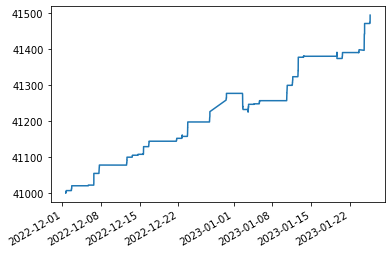

In [20]:
bal_agg_df["TOTAL"].plot()

In [21]:
days=(bal_agg_df.index[-1]-bal_agg_df.index[0]).days
roi = bal_agg_df.iloc[-1,-1]/bal_agg_df.iloc[0,-1]-1
print(f"Total ROI: {roi:.3%}")
print(f"Over: {days} days")
print(f"Annualized ROI: {(roi/days+1)**365-1:.3%}")

Total ROI: 1.203%
Over: 55 days
Annualized ROI: 8.307%


In [22]:
display(bal_agg_df)

,Ryanair,Tesla,Netflix,Google,Berkshire Hathaway,Amazon,Apple,Microsoft,General Motors,Meta,...,SAP,BP,Shell,Casio,Ferrari,Corsair,Spotify,Doordash,Deutsche Bank,TOTAL
2022-12-01 14:30:00+00:00,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,41000.000000
2022-12-01 14:35:00+00:00,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,41000.000000
2022-12-01 14:40:00+00:00,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,41000.000000
2022-12-01 14:45:00+00:00,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,41000.000000
2022-12-01 14:50:00+00:00,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,41000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-25 16:10:00+00:00,1017.284736,999.716743,1013.186415,998.302855,1005.029922,999.127536,1004.923132,1000.923256,1010.184337,1015.217329,...,1003.84085,1001.959318,1006.518727,1003.024138,1003.631776,1050.563830,1024.777033,1017.12989,1011.051057,41474.384599
2023-01-25 16:15:00+00:00,1017.284736,999.716743,1013.186415,998.302855,1005.029922,999.127536,1004.923132,1000.923256,1010.184337,1015.217329,...,1003.84085,1001.959318,1006.518727,1003.024138,1003.631776,1050.563830,1024.777033,1017.12989,1011.051057,41474.384599
2023-01-25 16:20:00+00:00,1017.284736,999.716743,1013.186415,998.302855,1005.029922,999.127536,1004.923132,1000.923256,1010.184337,1015.217329,...,1003.84085,1001.959318,1006.518727,1003.024138,1003.631776,1050.563830,1024.777033,1017.12989,1011.051057,41474.384599
2023-01-25 16:25:00+00:00,1017.284736,999.716743,1013.186415,998.302855,1005.029922,999.127536,1004.923132,1000.923256,1010.184337,1015.217329,...,1003.84085,1001.959318,1006.518727,1003.024138,1003.631776,1050.563830,1024.777033,1017.12989,1011.051057,41476.794750
